<h1>House Sales in King County, USA</h1>

<p>Este conjunto de datos contiene precios de venta de viviendas para el condado de King, que incluye Seattle. Incluye viviendas vendidas entre mayo de 2014 y mayo de 2015.</p>

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

In [1]:
# importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

<h2>Modulo 1. Importando el conjunto de datos</h2>

In [2]:
# cargando el csv
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
# mostrando las primeras 5 filas
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# mostrando la forma de dataframe filasxcolumnas
df.shape

(21613, 22)

<h3>Pregunta 1. </h3>
<p>Muestre los tipos de datos de cada columna usando la función dtypes.</p>

In [5]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
# Obtenemos un resumen estadistico
df. describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<h2>Modulo 2. Data Wrangling</h2>

<h3>Pregunta 3. </h3>
<p>Elimine las columnas <code>"id"</code> y <code>"Unnamed: 0"</code> de axis 1 usando el método <code>drop()</code>, luego use el método <code> describe()</code> para obtener un resumen estadístico de los datos. Asegúrese de que el parámetro <code>inplace</code> esté establecido en <code>True</code>
</p>

In [7]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace = True)

In [8]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<p>Podemos ver que nos faltan valores para las columnas <code>bedrooms</code> y <code>bathrooms</code></p>

In [10]:
print("Numero de valores  NaN de la columna bedrooms: ", df['bedrooms'].isnull().sum())
print("Numero de valores de NaN para la columna bathrooms: ", df['bathrooms'].isnull().sum())

Numero de valores  NaN de la columna bedrooms:  13
Numero de valores de NaN para la columna bathrooms:  10


<p>Podemos reemplazar los valores faltantes de la columna <code>bedrooms</code> con la media de la columna <code>'bedrooms' </code> usando el método <code>replace()</code>. No olvide establecer el parámetro <code>inplace</code> en <code>True</code></p>


In [11]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

<p>También reemplazamos los valores faltantes de la columna <code>'bathrooms'</code> con la media de la columna <code>'bathrooms'</code> usando el método <code>replace()</code>. No olvide configurar el parámetro <code> inplace </code> arriba <code> True </code></p>

In [12]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [13]:
# verificando si existen valores faltantes
print("Numero de valores NaN faltantes de la columna bedrooms :", df['bedrooms'].isnull().sum())
print("Numero de valores NaN faltantes de la columna bathrooms :", df['bathrooms'].isnull().sum())

Numero de valores NaN faltantes de la columna bedrooms : 0
Numero de valores NaN faltantes de la columna bathrooms : 0


<h2>Modulo 3: Analis Exploratorio de datos</h2>

<h3>Pregunta 3:</h3>
<p>Utilice el método <code>value_counts</code> para contar el número de casas con valores de piso únicos, utilice el método <code>.to_frame()</code> para convertirlo en un dataframe.</p>

In [14]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<h3>Pegunta 4.</h3>
<p>Utilice la función <code>boxplot</code> en la biblioteca seaborn para determinar si las casas con vista al mar o sin vista al mar tienen más valores atípicos de precios.</p>

<AxesSubplot:xlabel='waterfront', ylabel='price'>

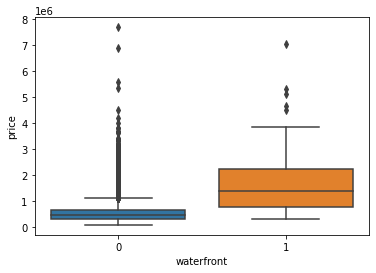

In [15]:
sns.boxplot(x='waterfront', y='price', data=df)

<h3>Pregunta 5.</h3>
<p>Utilice la función <code>regplot</code> en la biblioteca seaborn para determinar si la característica <code>sqft_above</code> está correlacionada positiva o negativamente con el precio.</p>

(0.0, 8081250.0)

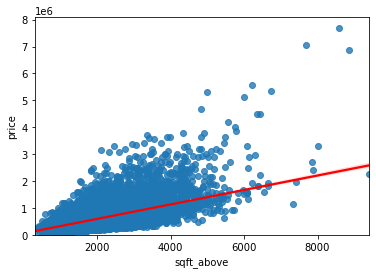

In [16]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<p>Podemos utilizar el método Pandas <code>corr()</code> para encontrar la característica distinta del precio que esté más correlacionada con el precio.</p>

In [17]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<h2>Modelo 4. Desarrollo del modelo</h2>

<p>Podemos ajustar un modelo de regresión lineal utilizando la función de longitud <code>long</code> y calcular el R^2.</p>

In [18]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

<h3>Pregunta 3. </h3>
<p>Ajuste un modelo de regresión lineal para predecir el <code>price</code> usando la característica <code>sqft_living</code> y luego calcule el R^2. Tome una captura de pantalla de su código y el valor de R^2.</p>

In [19]:
lm = LinearRegression()
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)

In [21]:
r2_score_slr = lm.score(X, Y)
print('The R-square para la regresion lineal es:', r2_score_slr)

The R-square para la regresion lineal es: 0.4928532179037931


<h3>Pregunta 7.</h3>
<p>Ajuste un modelo de regresión lineal para predecir el <code>price</code> usando la lista de características:</p>

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [23]:
# Calculando R^2
lm1 = LinearRegression()
X = df[features]
Y = df['price']
lm1.fit(X,Y)
lm1.score(X,Y)

0.6576956677966457

<p>Crea una lista de tuplas, el primer elemento de la tupla contiene el nombre del estimador: </p>
<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>
<p>El segundo elemento de la tupla contiene el constructor del modelo.</p>

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [24]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

<h3>Pregunta 8.</h3>
<p>Utilice la lista para crear un objeto de canalización para predecir el <code>price</code>, ajuste el objeto utilizando las características de la lista <code>features</code> y calcule el R^2</p>

In [25]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [26]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [27]:
pipe.score(X,Y)

0.7510934083974906

<h2>Modulo 5. Evaluacion y refinamiento del modelo.</h2>

In [29]:
# importando librerias
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("listo!!!")

listo!!!


In [30]:
# Dividiremos los datos en conjuntos de entrenamiento y prueba:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("Numero de muestras de prueba:", x_test.shape[0])
print("Numero de muestras de entrenamiento:",x_train.shape[0])

Numero de muestras de prueba: 3242
Numero de muestras de entrenamiento: 18371


<h3>Pregunta 9.</h3>
<p>Cree y ajuste un objeto de regresión Ridge utilizando los datos de entrenamiento, establezca el parámetro de regularización en <code>0.1</code> y calcule el R^2 utilizando los datos de prueba.</p>

In [31]:
from sklearn.linear_model import Ridge

In [32]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6478759163939114

<h3>Pregunta 10.</h3>
<p>Realice una transformación polinómica de segundo orden tanto en los datos de entrenamiento como en los de prueba. Cree y ajuste un objeto de regresión Ridge utilizando los datos de entrenamiento, establezca el parámetro de regularización en 0,1 y calcule el R^2 utilizando los datos de prueba proporcionados.</p>

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = Ridge(alpha=0.1)
poly.fit(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.7002744235551377